1) Prepare a classification model using Naive Bayes 
* for salary data 

* Data Description:

* age -- age of a person
* workclass	-- A work class is a grouping of work 
* education	-- Education of an individuals	
* maritalstatus -- Marital status of an individulas	
* occupation	 -- occupation of an individuals
* relationship -- 	
* race --  Race of an Individual
* sex --  Gender of an Individual
* capitalgain --  profit received from the sale of an investment	
* capitalloss	-- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week	
* native -- Native of an individual
* Salary -- salary of an individual


### Import necessary library

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB as mb
from sklearn.naive_bayes import GaussianNB as gb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Import dataset

In [2]:
# training data
training_data = pd.read_csv('SalaryData_Train.csv')
training_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Initial analysis

In [3]:
training_data.shape

(30161, 14)

In [4]:
training_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [5]:
training_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# testing data
test_data = pd.read_csv('SalaryData_Test.csv')
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


### Initial Analysis of testing data

In [8]:
test_data.shape

(15060, 14)

In [9]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


### visualization of data 

<AxesSubplot:xlabel='Salary', ylabel='count'>

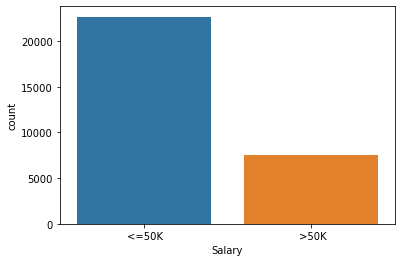

In [12]:
sns.countplot(x = training_data['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

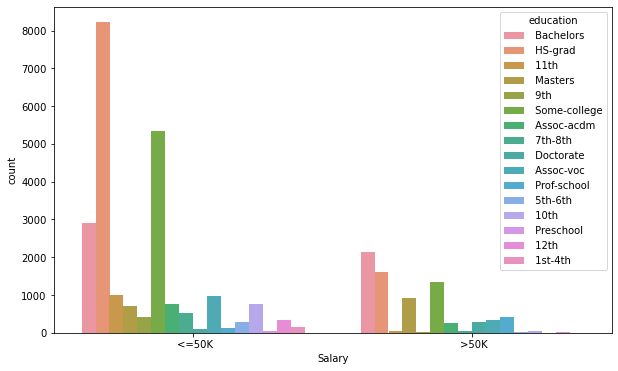

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = training_data['Salary'],hue= training_data['education'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

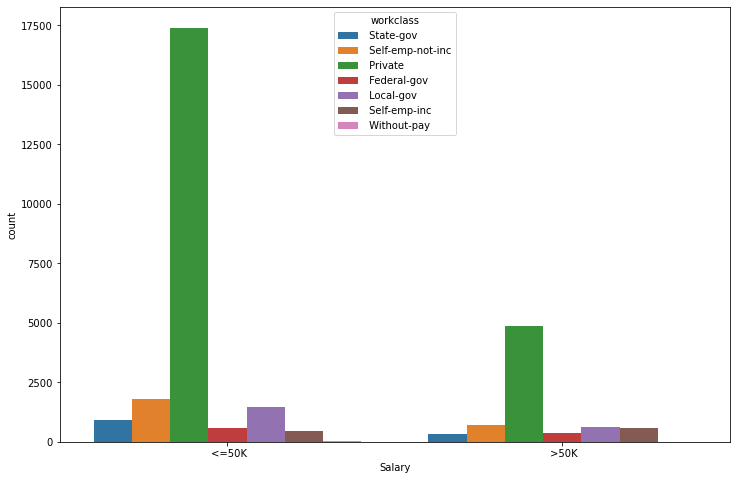

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(x = training_data['Salary'], hue= training_data['workclass'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

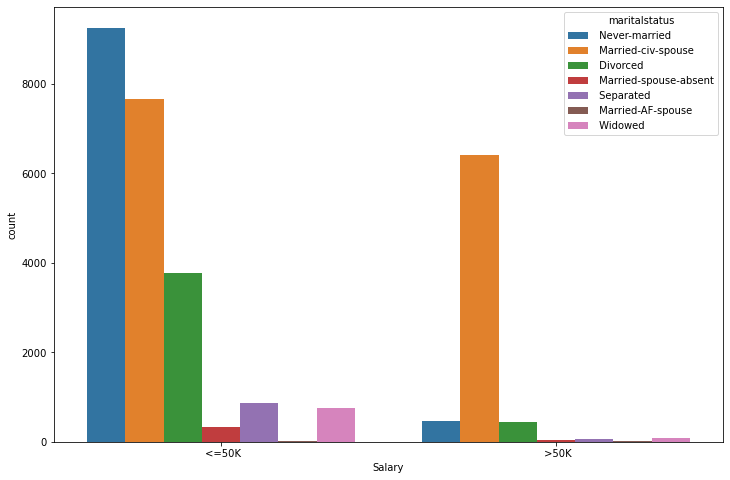

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x = training_data['Salary'], hue= training_data['maritalstatus'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

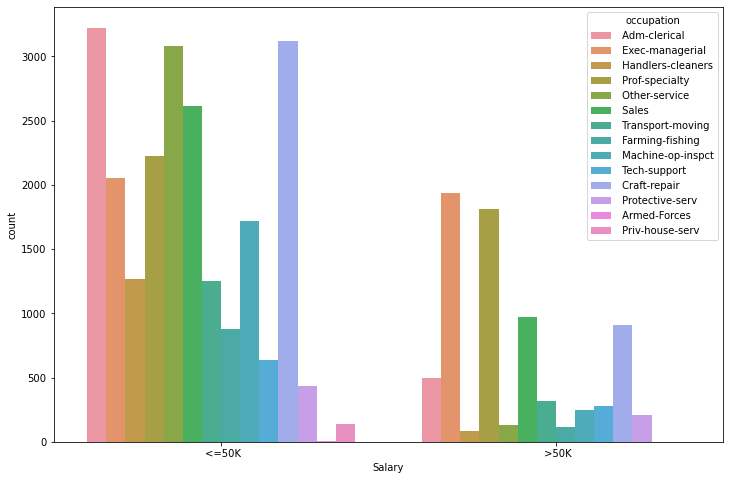

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x = training_data['Salary'], hue = training_data['occupation'])

### Labelencoding technique

In [22]:
le = LabelEncoder()
training_data['Salary'] = le.fit_transform(training_data['Salary'])
test_data['Salary'] = le.fit_transform(test_data['Salary'])

In [23]:
training_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [24]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [25]:
training_data = pd.get_dummies(data= training_data, columns= ['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])

In [27]:
training_data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
training_data.columns

Index(['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek',
       'Salary', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Private', 'workclass_ Self-emp-inc',
       ...
       'native_ Portugal', 'native_ Puerto-Rico', 'native_ Scotland',
       'native_ South', 'native_ Taiwan', 'native_ Thailand',
       'native_ Trinadad&Tobago', 'native_ United-States', 'native_ Vietnam',
       'native_ Yugoslavia'],
      dtype='object', length=103)

In [30]:
test_data = pd.get_dummies(data= test_data, columns= ['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])

In [31]:
test_data

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


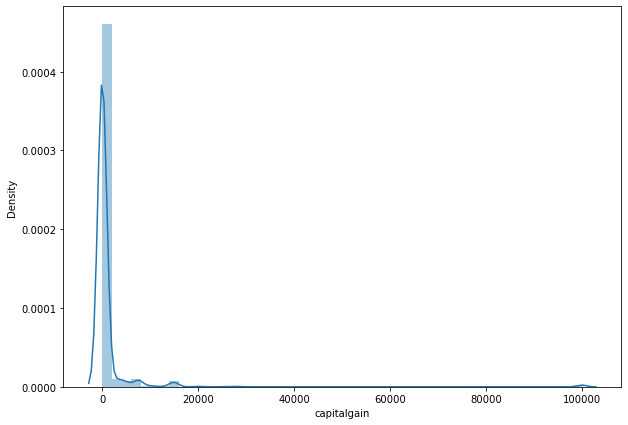

In [36]:
plt.figure(figsize=(10,7))
sns.distplot(training_data['capitalgain'])
plt.show()

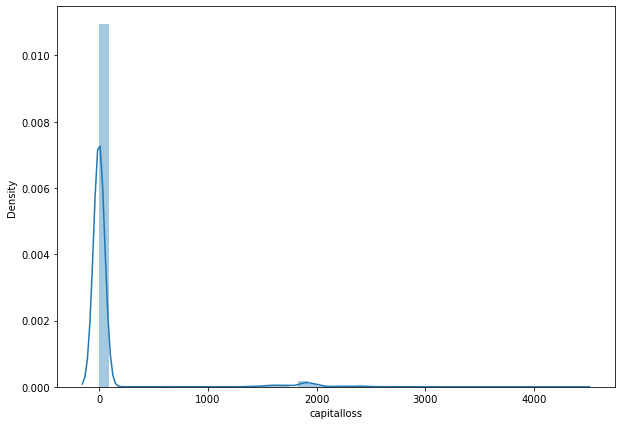

In [37]:
plt.figure(figsize=(10,7))
sns.distplot(training_data['capitalloss'])
plt.show()

### Model building

In [38]:
x_train = training_data.drop(labels= 'Salary', axis = 1)
y_train = training_data[['Salary']]

In [39]:
x_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y_train.head()

,Salary
0,0
1,0
2,0
3,0
4,0


In [41]:
# testing data
x_test = test_data.drop(labels='Salary',axis = 1)
y_test = test_data['Salary']

In [42]:
x_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
y_test.head()

0    0
1    0
2    1
3    1
4    0
Name: Salary, dtype: int32

### Model training

#### Gaussian Naive Bayes

In [46]:
# training model
train_model = gb()
train_model.fit(x_train,y_train)

GaussianNB()

In [47]:
y_train_pred = train_model.predict(x_train)

In [49]:
accuracy_score(y_train,y_train_pred)

0.8031563940187659

In [50]:
confusion_matrix(y_train,y_train_pred)

array([[18151,  4502],
       [ 1435,  6073]], dtype=int64)

In [52]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     22653
           1       0.57      0.81      0.67      7508

    accuracy                           0.80     30161
   macro avg       0.75      0.81      0.77     30161
weighted avg       0.84      0.80      0.81     30161



In [53]:
# testing model
y_test_pred = train_model.predict(x_test)

In [54]:
accuracy_score(y_test,y_test_pred)

0.8029216467463479

In [55]:
confusion_matrix(y_test,y_test_pred)

array([[9073, 2287],
       [ 681, 3019]], dtype=int64)

In [56]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     11360
           1       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



In [57]:
print('training data accurancy score is: ',accuracy_score(y_train,y_train_pred))
print('testing data accurancy score is: ',accuracy_score(y_test,y_test_pred))

training data accurancy score is:  0.8031563940187659
testing data accurancy score is:  0.8029216467463479


#### Multinominal Naive Bayes

In [58]:
mb_model = mb()
mb_model.fit(x_train,y_train)

MultinomialNB()

In [59]:
y_mb_train = mb_model.predict(x_train)

In [60]:
# training data
accuracy_score(y_train,y_mb_train)

0.7729186698053778

In [61]:
confusion_matrix(y_train,y_mb_train)

array([[21717,   936],
       [ 5913,  1595]], dtype=int64)

In [62]:
print(classification_report(y_train,y_mb_train))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     22653
           1       0.63      0.21      0.32      7508

    accuracy                           0.77     30161
   macro avg       0.71      0.59      0.59     30161
weighted avg       0.75      0.77      0.73     30161



In [63]:
# testing data
y_test_mb = mb_model.predict(x_test)

In [64]:
accuracy_score(y_test,y_test_mb)

0.7749667994687915

In [65]:
confusion_matrix(y_test,y_test_mb)

array([[10891,   469],
       [ 2920,   780]], dtype=int64)

In [66]:
print(classification_report(y_test,y_test_mb))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [67]:
print('training accurancy of Multinominal Naive Bayes model: ',accuracy_score(y_train,y_mb_train))
print('testing accurancy of Multinominal Naive Bayes model: ',accuracy_score(y_test,y_test_mb))

training accurancy of Multinominal Naive Bayes model:  0.7729186698053778
testing accurancy of Multinominal Naive Bayes model:  0.7749667994687915
